In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import loguniform

In [2]:
data_raw = pd.read_csv('data/cleaned_data.csv', parse_dates=['author_date_of_birth', 'publication_date'])

# Feature engineering

In [3]:
data_raw['description_length'] = data_raw['description'].str.len()

In [4]:
data_raw['number_of_pages'] = data_raw['number_of_pages'].astype(int)

In [5]:
categorical_features = ['language', 'category', 'format']

In [6]:
data_raw['language'].unique()

array(['polski', 'angielski', 'niemiecki'], dtype=object)

In [7]:
le = LabelEncoder()
for cat in categorical_features:
    data_raw[cat] = le.fit_transform(data_raw[cat])

In [308]:
rating_features = [f'rating_{i}' for i in range(1, 11)]
scaled_features = [f'scaled_{element}' for element in rating_features]
normalized_features = [f'normalized_{element}' for element in rating_features]

In [309]:
# to be predicted
threshold = 2000
data_raw['bestseller'] = (data_raw['number_of_people_has'] >= threshold).astype(int)

In [310]:
scaler = MinMaxScaler((0, 1))

In [311]:
data_raw = data_raw.loc[data_raw[rating_features].any(axis=1) > 0]

In [312]:
# scaling ratings
data_raw[scaled_features] = scaler.fit_transform(data_raw[rating_features])

In [313]:
# normalized features
data_raw[normalized_features] = (data_raw[rating_features].T/data_raw[rating_features].sum(axis=1)).T

<Axes: >

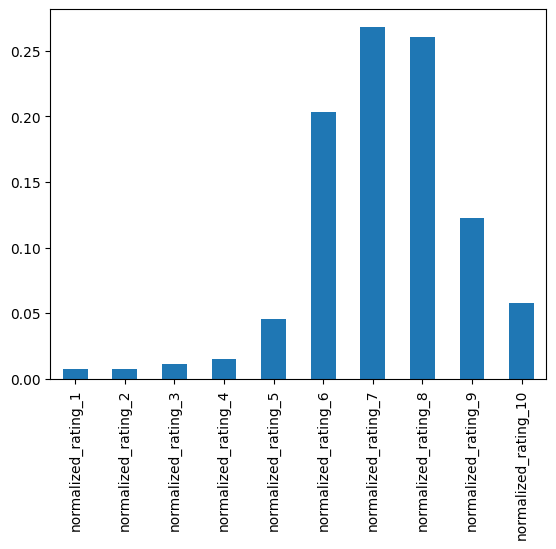

In [315]:
data_raw.loc[12000, normalized_features].plot.bar()

In [316]:
data_raw.columns

Index(['author_average_rating', 'author_number_of_people_read',
       'author_number_of_people_wants_to_read', 'author_date_of_birth',
       'author_number_of_fans', 'author_number_of_books_written',
       'author_number_of_awards', 'number_of_user_opinions',
       'number_of_user_ratings', 'number_of_discussions',
       'number_of_people_read', 'publication_date', 'number_of_pages',
       'series', 'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5',
       'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10', 'category',
       'part_of_cycle', 'language', 'number_of_people_has',
       'number_of_people_favorite', 'number_of_people_wants_to_read',
       'number_of_people_wants_as_gift', 'number_of_people_currently_read',
       'description', 'format', 'description_length', 'bestseller',
       'scaled_rating_1', 'scaled_rating_2', 'scaled_rating_3',
       'scaled_rating_4', 'scaled_rating_5', 'scaled_rating_6',
       'scaled_rating_7', 'scaled_rating_8', 'sca

In [318]:
data = data_raw.drop(['number_of_user_opinions', 'number_of_user_opinions', 'number_of_user_ratings', 'number_of_discussions', 'number_of_people_read', 'number_of_people_has', 'number_of_people_favorite', 'number_of_people_currently_read', 'number_of_people_wants_to_read', 'number_of_people_wants_as_gift', 'number_of_people_currently_read', 'description', 'series', 'publication_date', 'author_date_of_birth'], axis=1)

In [319]:
data.columns

Index(['author_average_rating', 'author_number_of_people_read',
       'author_number_of_people_wants_to_read', 'author_number_of_fans',
       'author_number_of_books_written', 'author_number_of_awards',
       'number_of_pages', 'rating_1', 'rating_2', 'rating_3', 'rating_4',
       'rating_5', 'rating_6', 'rating_7', 'rating_8', 'rating_9', 'rating_10',
       'category', 'part_of_cycle', 'language', 'format', 'description_length',
       'bestseller', 'scaled_rating_1', 'scaled_rating_2', 'scaled_rating_3',
       'scaled_rating_4', 'scaled_rating_5', 'scaled_rating_6',
       'scaled_rating_7', 'scaled_rating_8', 'scaled_rating_9',
       'scaled_rating_10', 'normalized_rating_1', 'normalized_rating_2',
       'normalized_rating_3', 'normalized_rating_4', 'normalized_rating_5',
       'normalized_rating_6', 'normalized_rating_7', 'normalized_rating_8',
       'normalized_rating_9', 'normalized_rating_10'],
      dtype='object')

In [324]:
correlation_matrix = data.drop(rating_features + scaled_features, axis=1).corr()

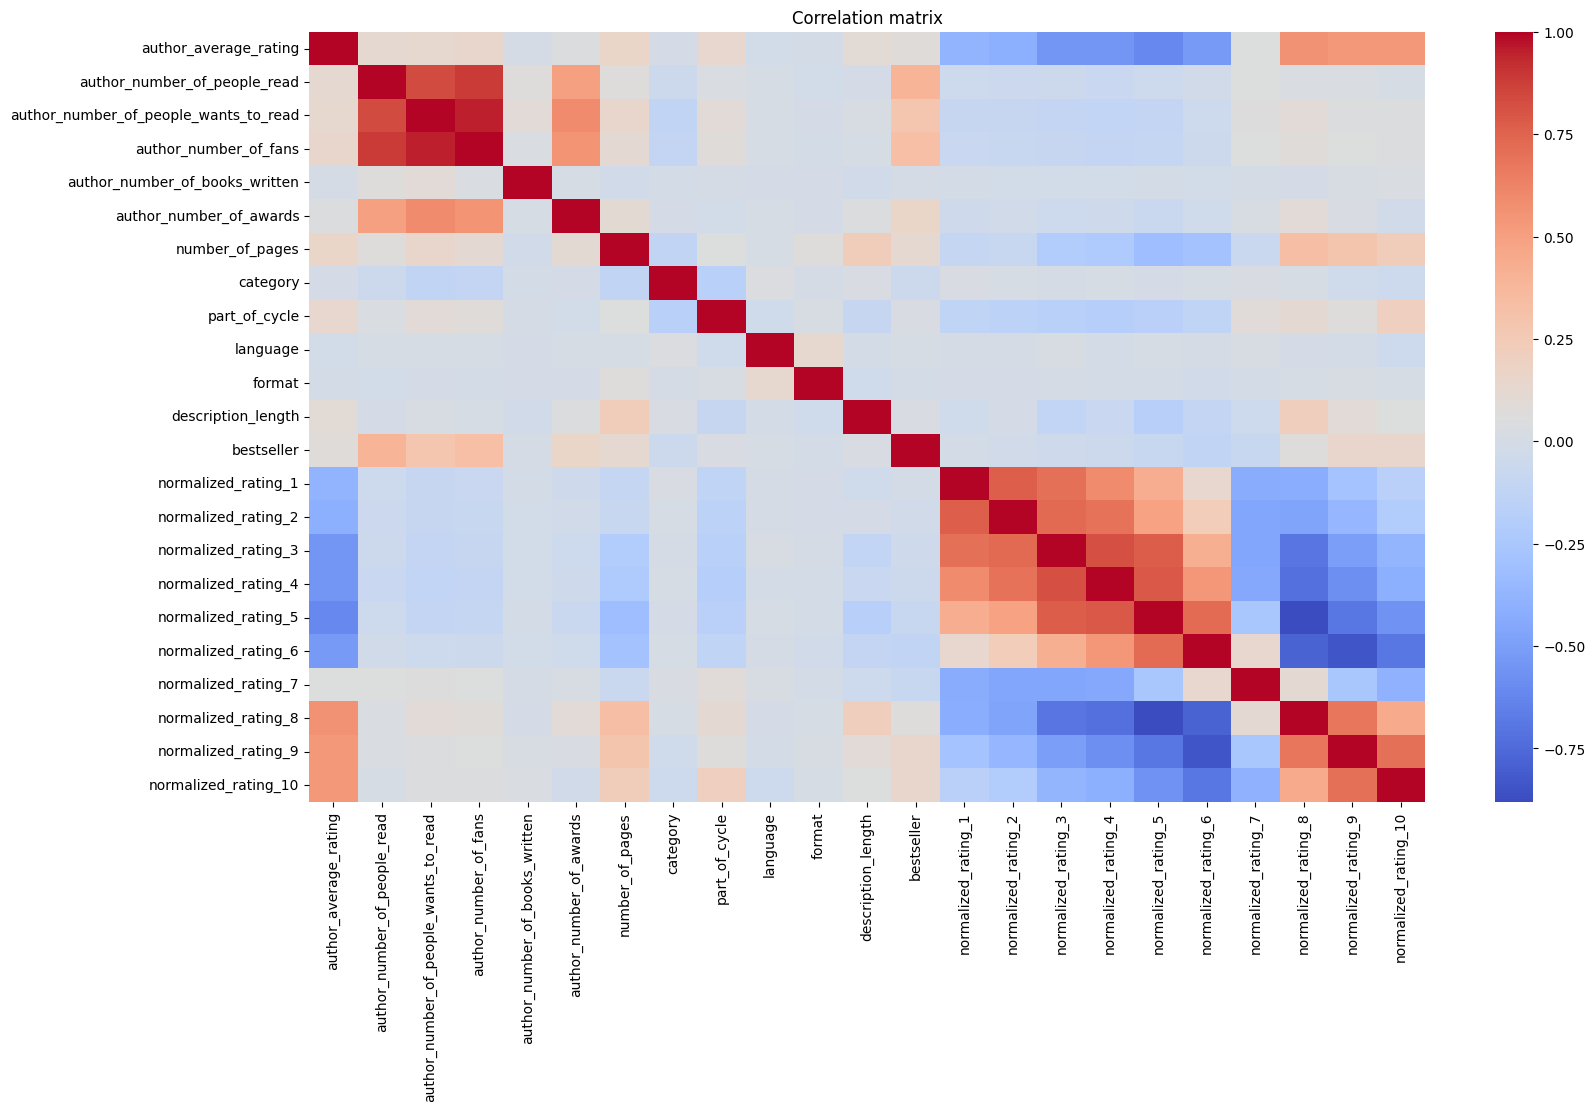

In [326]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [327]:
X = data.drop(['bestseller'] + rating_features + scaled_features, axis=1)
y = data['bestseller']

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=80085)
print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (7590, 22)
Test size: (7591, 22)


In [329]:
from sklearn.feature_selection import f_classif, RFE

In [330]:
# random_forrest_classifier_hyper_parameters = {
#     'max_depth': 20,
#     'max_features': None,
#     'min_samples_leaf': 3,
#     'min_samples_split': 10,
#     'n_estimators': 150
#     }

In [331]:
# Define hyperparameter space
# param_dist = {
#     "C": loguniform(1e-4, 10),  # Log-uniform distribution for C
#     "penalty": ["l1", "l2"],  # Regularization type
#     "solver": ["liblinear", "lbfgs"]
# }

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform  # Fix loguniform import
from sklearn.feature_selection import RFECV

# Logistic regression pipeline

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mateusz/dev/lubimyczytac_project/lubimyczytac/lib64/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

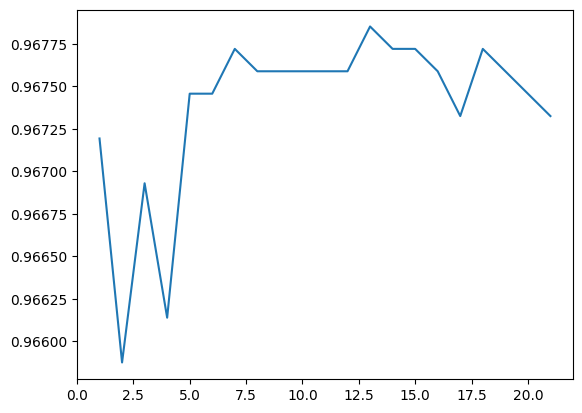

In [387]:
param_dist = [
    {"classifier__C": loguniform(1e-4, 10), "classifier__penalty": ["l1"], "classifier__solver": ["liblinear"], "feature_selection__k": np.arange(1, 22)},
    {"classifier__C": loguniform(1e-4, 10), "classifier__penalty": ["l2"], "classifier__solver": ["lbfgs"], "feature_selection__k": np.arange(1, 22)}
]

log_reg_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', LogisticRegression(max_iter=2000))
])
log_reg_pipeline.fit(X_train, y_train)

randomized_log_reg = RandomizedSearchCV(
    log_reg_pipeline, param_distributions=param_dist, scoring='accuracy', n_iter=10, cv=5, verbose=1, n_jobs=-1
)

randomized_log_reg.fit(X_train, y_train)

In [391]:
np.argmax(precision)
randomized_log_reg.best_params_

{'classifier__C': np.float64(1.9390466659796057),
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [392]:
optimized_logreg_model = randomized_log_reg.best_estimator_

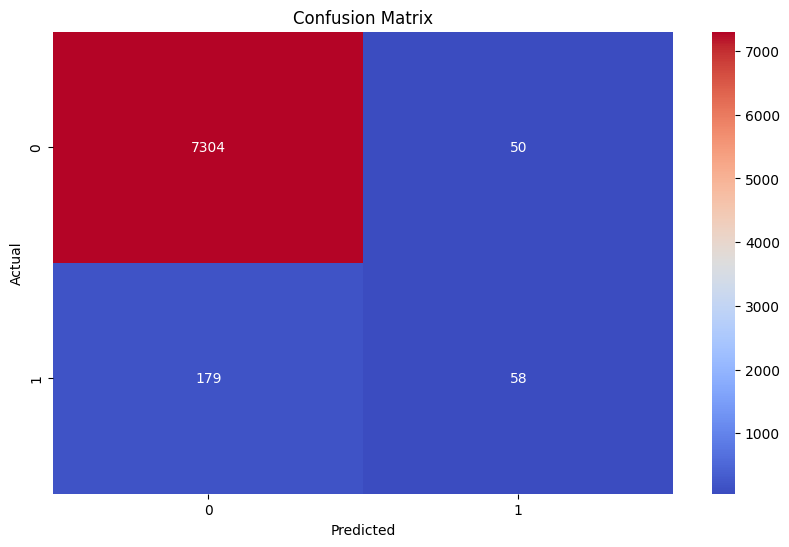

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7354
           1       0.54      0.24      0.34       237

    accuracy                           0.97      7591
   macro avg       0.76      0.62      0.66      7591
weighted avg       0.96      0.97      0.96      7591



In [393]:
log_y_pred = optimized_logreg_model.predict(X_test)
# plot confusion matrix
conf_matrix = confusion_matrix(y_test, log_y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, log_y_pred))